In [44]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [45]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [46]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [47]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [48]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [49]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [50]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [51]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [52]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).first()

print(most_recent_date)

('2017-08-23',)


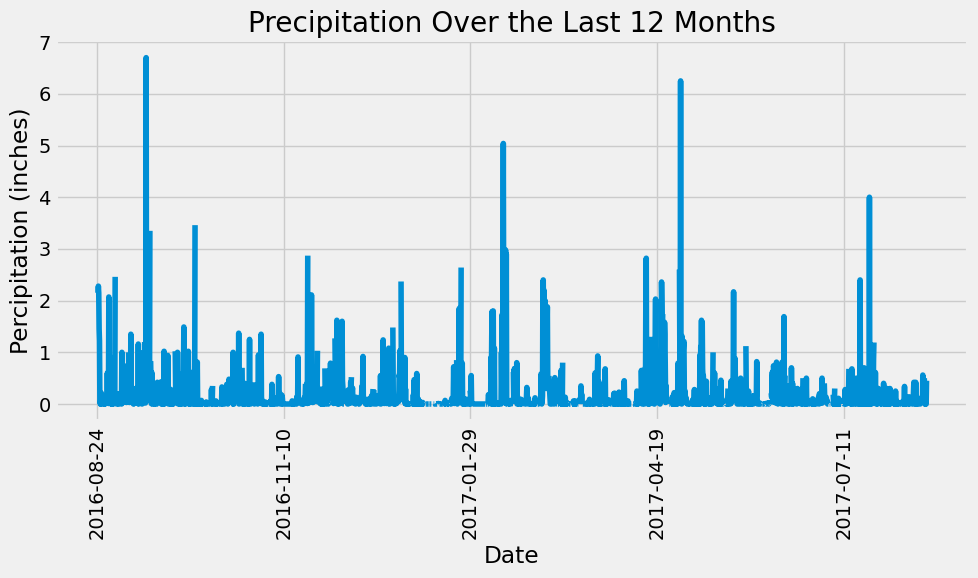

In [53]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.
last_date = dt.datetime.strptime(most_recent_date[0], '%Y-%m-%d')
one_year_ago = last_date - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_data, columns=['date', 'prcp'])

# Sort the dataframe by date
precipitation_df.sort_values(by= 'date', inplace=True)


# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(x='date', y='prcp', figsize=(10, 6), title="Precipitation Over the Last 12 Months", legend=False)


plt.xlabel('Date')
plt.ylabel('Percipitation (inches)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [54]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [55]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()
print(f"Total number of stations: {total_stations}")

Total number of stations: 9


In [56]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_station = session.query(Measurement.station, func.count(Measurement.id))\
                            .group_by(Measurement.station)\
                            .order_by(func.count(Measurement.id).desc())\
                            .all()

for station, count in most_active_station:
    print(f"('{station}', {count}),")

('USC00519281', 2772),
('USC00519397', 2724),
('USC00513117', 2709),
('USC00519523', 2669),
('USC00516128', 2612),
('USC00514830', 2202),
('USC00511918', 1979),
('USC00517948', 1372),
('USC00518838', 511),


In [57]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = 'USC00519281'  # Replace this with the ID of the most active station if needed
temperature_stats = session.query(
    func.min(Measurement.tobs), 
    func.max(Measurement.tobs), 
    func.avg(Measurement.tobs)
).filter(Measurement.station == most_active_station_id).all()

print(temperature_stats)

[(54.0, 85.0, 71.66378066378067)]


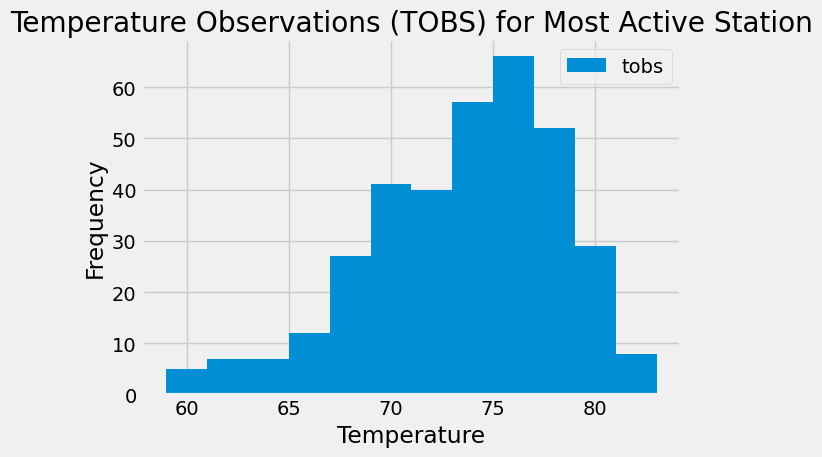

In [58]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = session.query(Measurement.tobs)\
                   .filter(Measurement.station == most_active_station_id)\
                   .filter(Measurement.date >= one_year_ago)\
                   .all()

tobs_df = pd.DataFrame(tobs_data, columns=['tobs'])



tobs_df.plot.hist(bins=12, title="Temperature Observations (TOBS) for Most Active Station")
plt.xlabel('Temperature')
plt.tight_layout()
plt.show()

In [59]:
# print(tobs_df.head)

# Close Session

In [60]:
# Close Session
session.close()